

---


#  🟢**Disciplina CAT314** - Ferramentas de Previsão de Curtíssimo Prazo (nowcasting)


---






## **Aula Prática 3:** $\underline{Rastreamento\ Manual\ por\ Satelite}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como realizar o rastreamento manual de uma tempestade com imagens do canal infravermelho. Para isto usaremos os dados do sensor [Advanced Baseline Imager (ABI)](https://space.oscar.wmo.int/instruments/view/abi) e [Geostationary Lightning Mapper (GLM)](https://space.oscar.wmo.int/instruments/view/glm) do satélite [Geostationary Operational Environmental Satellite (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16).

---


**DADOS DE ENTRADA**: Serão utilizados os dados do ABI e GLM da NOAA.



1. $\underline{Dados\ de\ Relâmpagos}$: sensor GLM do satélite GOES-16
- **Tipo do dado:** pontuais
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** OR_GLM-L2-LCFA_G16_s20210010306000_e20210010306204_c20210010306215
- **Fonte dos dados:** FTP da [Amazon](https://noaa-goes16.s3.amazonaws.com/index.html#GLM-L2-LCFA/)

    ----------

2. $\underline{Dados\ de\ Tempertura\ de\ Brilho}$: sensor ABI do satélite GOES-16
- **Tipo do dado:** matriz
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** OR_ABI-L2-CMIPF-M6C01_G16_s20220090940205_e20220090949513_c20220090949586.nc
- **Fonte dos dados:** FTP do [Amazon](https://noaa-goes16.s3.amazonaws.com/index.html#ABI-L2-CMIPF/)


---

**DADOS DE SAÍDA:** Figuras de temperatura de brilho
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. script_1_2024-04-30_13_00_UTC.jpg
    2. script_2a_2024-04-30_13_00_UTC.jpg
    3. script_2b_animacao.gif
    4. script_2c_evolucacao_temporal.jpg
     

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   **1° Passo:** Preparando o Ambiente
2.   **Script 01** - Imagem IR (10.35 μm) + Total de Flashes do GLM
3.   **Script 02** - Evolução Temporal da Temperatura de Brilho do IR e Flashes GLM


---
**OBSERVAÇÕES IMPORTANTES**:
1. Esse código foi construído baseado no minicurso de Nowcasting ministrado na Confererência Pan-Americana de Meteorologia (CPAM) em agosto de 2024.

---
- **Realizado por:** Diego Souza/INPE e Enrique V. Mattos - 19/08/2024
- **Atualizado por:** Enrique V. Mattos - 18/09/2025


---

# **1° Passo:** Preparando o Ambiente

## **a) Instalando as Bibliotecas Necessárias**



In [1]:
!pip install -q cartopy boto3 gdal salem rasterio pyproj geopandas descartes geobr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.2 MB/s eta 0:00:00


## **b) Download de Arquivos Auxiliares**

Neste passo vamos baixar alguns arquivos auxiliares necessários para parte dos scripts que serão demonstrados no curso:

*   **utilities.py:** Script com algumas funções para processamento de dados de satélite
*   **ir.cpt:** Paleta de cores para o canal do infravermelhos do GOES-16

In [2]:
# importa biblioteca que contabiliza o tempo de processamento
import time

# Download do arquivo "utilities.py"
!wget -c https://github.com/evmpython/CAT314_UNIFEI_2025/raw/main/utils/utilities.py

# Download da paleta de cores para o canal do infravermelho
!wget -c https://github.com/evmpython/CAT314_UNIFEI_2025/raw/main/utils/ir.cpt

--2025-09-18 17:39:34--  https://github.com/evmpython/CAT314_UNIFEI_2025/raw/main/utils/utilities.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT314_UNIFEI_2025/main/utils/utilities.py [following]
--2025-09-18 17:39:34--  https://raw.githubusercontent.com/evmpython/CAT314_UNIFEI_2025/main/utils/utilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17330 (17K) [text/plain]
Saving to: ‘utilities.py’

utilities.py        100%[===================>]  16.92K  --.-KB/s    in 0.001s  

2025-09-18 17:39:34 (14.2 MB/s) - ‘utilities.py’ saved [17330/17330]

--2025-09-18 17:39:34--  

## **c) Montando Drive e Definindo Caminho**

In [3]:
# montando o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# nome do diretório
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT314 - FERRAMENTAS DE PREVISÃO DE CURTÍSSIMO PRAZO (NOWCASTING) /AULAS/CAT314 - PYTHON PARA NOWCASTING'

# cria a pasta de saída com o nome "output"
import os
dir_output = f'{dir}/output/aula_03/'
os.makedirs(dir_output, exist_ok=True)

# **Script 01** - Imagem IR (10.35 μm) + Total de Flashes do GLM

- Neste script iremos plotar a imagem do canal CH13 do sensor ABI do GOES-16 com as ocorrências de flashes registradas pelo sensor GLM do GOES-16


Remapping...
Remap finished! Time: 0.08 seconds


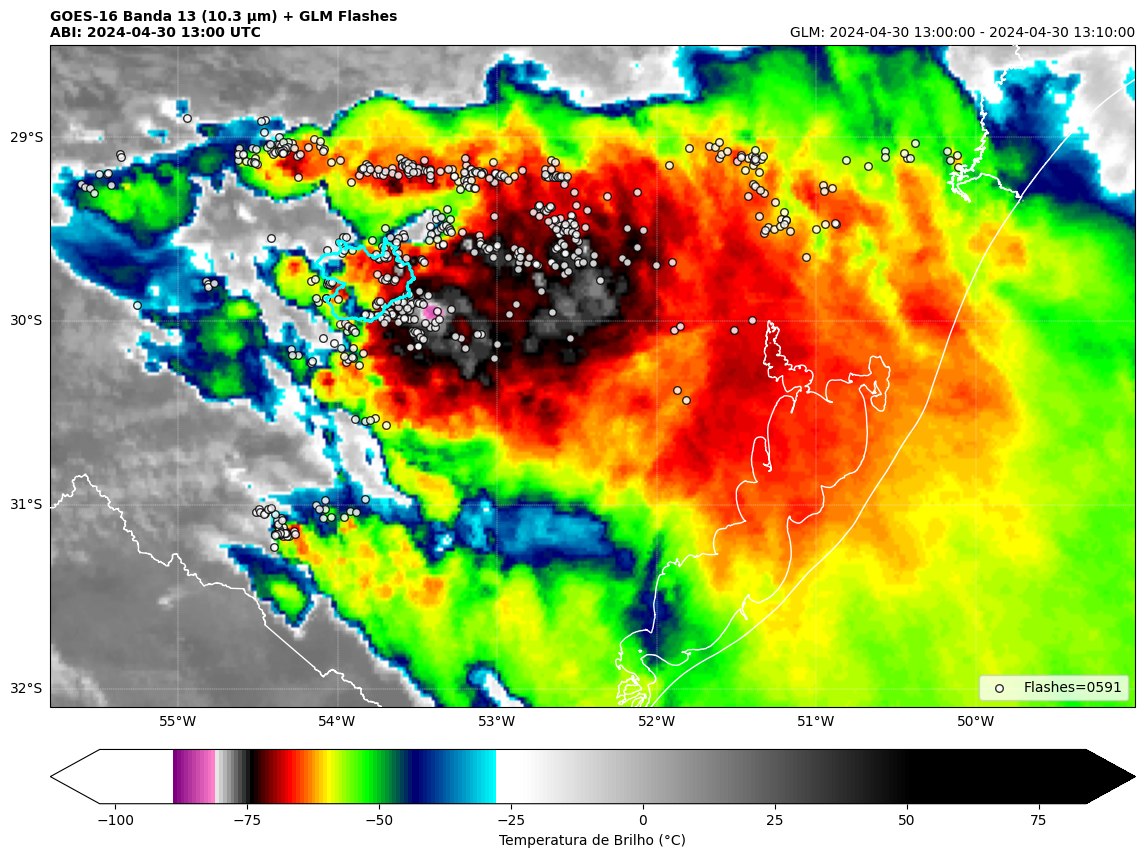

CPU times: user 13.7 s, sys: 1.34 s, total: 15.1 s
Wall time: 1min 27s


In [5]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from datetime import timedelta, datetime
from utilities import download_CMI, download_GLM, remap, loadCPT
import numpy as np
import os
import pandas as pd
import geobr

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f'{dir_output}'

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202404301300'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                         REPROJETA E FAZ A LEITURA DO ARQUIVO
#========================================================================================================================#
# área desejada da imagem
lonmin = -55.8
lonmax = -49.0
latmin = -32.1
latmax = -28.5

# coloca os limites da área numa lista
extent = [lonmin, latmin, lonmax, latmax]

# chama a função que faz a reprojeção (file, variable, extent, resolution)
grid = remap(path, 'CMI', extent, 2)

# leitura do dado e transforma para °C
data = grid.ReadAsArray() - 273.15

#========================================================================================================================#
#                                              DOWNLOAD DOS DADOS DO GLM
#========================================================================================================================#
# inicializa os arrays de latitude e longitude dos flashes
lats_flash = np.array([])
lons_flash = np.array([])

# extrai o ano, mês, dia, hora, minuto e segundos
yyyy = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%Y')
mm = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%m')
dd = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%d')
hh = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%H')
mn = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%M')
date_ini = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)))
date_end = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)) + timedelta(minutes=10))
date_loop = date_ini

# Loop nos arquivos do GLM
while (date_loop <= date_end):

    # data
    yyyymmddhhmnss = datetime.strptime(date_loop, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M%S')

    # Download o arquivo
    file_glm = download_GLM(yyyymmddhhmnss, input)

    # leitura do arquivo
    glm_20s = xr.open_dataset(f'{input}/{file_glm}.nc')

    # appenda as lats / longs
    lats_flash = np.append(lats_flash, glm_20s['flash_lat'][:])
    lons_flash = np.append(lons_flash, glm_20s['flash_lon'][:])

    # fecha o arquivo
    glm_20s.close()

    # incrementa a variável the date_loop
    date_loop = str(datetime.strptime(date_loop, '%Y-%m-%d %H:%M:%S') + timedelta(seconds=20))

# coloca os flashes num dataframe
data_flash = {'lat': lats_flash, 'lon': lons_flash}
df = pd.DataFrame(data_flash)

# seleciona os flashes da região de interesse
df_flash_filtered = df[ (df['lon'] > extent[0]) & (df['lon'] < extent[2]) & (df['lat'] > extent[1]) & (df['lat'] < extent[3])]

# transforma o dataframe para array
lons_flash_filtered, lats_flash_filtered = df_flash_filtered['lon'].values, df_flash_filtered['lat'].values

#========================================================================================================================#
#                                                 PLOTA A IMAGEM
#========================================================================================================================#
#----------------------------------------------------------------#
#               Define a configuração do gráfico
#----------------------------------------------------------------#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(14,11))

# projeção geoestacionária do cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# define a extensão da imagem
#            lonmin,     lonmax,    latmin,    latmax
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# converte o arquivo CPT para ser usado em Python
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

#----------------------------------------------------------------#
#                       Plota mapa
#----------------------------------------------------------------#
img = ax.imshow(data, origin='upper', vmin=-103.0, vmax=84, extent=img_extent, cmap=colormap)

#----------------------------------------------------------------#
#                       Plota GLM
#----------------------------------------------------------------#
glm = plt.scatter(lons_flash_filtered, lats_flash_filtered, transform=ccrs.PlateCarree(), marker='o', s=30, facecolor='white', edgecolor='black', linewidth=1, alpha=0.8, zorder=2, label=f'Flashes={str(len(lats_flash_filtered)).zfill(4)}')

#----------------------------------------------------------------#
#                      Plota shapefiles
#----------------------------------------------------------------#
# carrega o shapefiles de todos municípios do Brasil
municipios = geobr.read_municipality(year=2020)

# filtra apenas o município de Santa Maria
santa_maria = municipios[municipios['name_muni'] == 'Santa Maria']

# plota o município de Santa Maria
santa_maria.plot(ax=ax, edgecolor='cyan', facecolor='none', linewidth=2.0, label='Santa Maria', zorder=3)

# carrega o shapefile dos estados brasileiros. Usa a função read_state do geobr para obter os polígonos dos estados
estados = geobr.read_state(year=2020)

# filtra os estados dentro da extensão do mapa. Cria uma máscara para selecionar apenas os estados que intersectam com a área do mapa
estados_filtrados = estados.cx[extent[0]:extent[2], extent[1]:extent[3]]

# plota estados
estados_filtrados.plot(ax=ax, edgecolor='white', facecolor='none', linewidth=1.0, zorder=3)

#----------------------------------------------------------------#
#           Plota demais formatações do gráfico
#----------------------------------------------------------------#
# define os limites do eixo para a extensão da imagem
ax.set_xlim(extent[0], extent[2])  # lonmin, lonmax
ax.set_ylim(extent[1], extent[3])  # latmin, latmax

# legenda
ax.legend(loc='lower right', ncols=1, facecolor='white', frameon=True)

# linhas costeiras, bordas e linhas de grade do mapa
#ax.coastlines(resolution='10m', color='white', linewidth=0.8)
#ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 1), ylocs=np.arange(-90, 90, 1), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#----------------------------------------------------------------#
#                      Plota shapefiles
#----------------------------------------------------------------#
# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='horizontal', pad=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(xr.open_dataset(path).time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título
plt.title(f'GOES-16 Banda 13 (10.3 µm) + GLM Flashes\nABI: {date}', fontweight='bold', fontsize=10, loc='left')
plt.title(f'GLM: {str(date_ini)} - {str(date_end)}', fontsize="10", loc="right")

#----------------------------------------------------------------#
#                    Salva figura
#----------------------------------------------------------------#
# salva figura
plt.savefig(f'{output}/script_1_{date.replace(" ", "_")}.png', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

In [7]:
# mostra o dado da imagem de satélite em formato "array"
data

array([[ 14.656952,  14.656952,  13.796631, ..., -18.958008, -16.192596,
        -16.192596],
       [ 16.50058 ,  15.271484,  15.947479, ..., -17.851837, -17.851837,
        -18.159119],
       [  8.57309 ,   7.835663,  10.846863, ..., -15.393707, -18.835083,
        -20.002716],
       ...,
       [  9.187622,  11.461395,  13.489349, ..., -54.60092 , -54.969635,
        -55.461273],
       [ 11.277039,  12.383179,  13.673706, ..., -54.723846, -54.908203,
        -54.908203],
       [ 14.59552 ,  12.383179,  12.383179, ..., -54.478027, -54.478027,
        -54.908203]], dtype=float32)

#**Script 02** - Evolução Temporal da Temperatura de Brilho do IR e Flashes GLM

Nesse script avaliaremos a evolução temporal da temperatura de bilho e flashes para a tesmpestade.




## **Mapa**
- O processamento de 2h de imagens GOES-16 + GLM demora aproximadamente 3-5 min.

In [10]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from datetime import timedelta, datetime
from utilities import download_CMI, download_GLM, remap, loadCPT
import numpy as np
import os
import pandas as pd
import geopandas as gpd
import salem

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f'{dir_output}'

# Channel
band = '13'

# área desejada da imagem
lonmin = -55.8
lonmax = -49.0
latmin = -32.1
latmax = -28.5

# coloca os limites da área numa lista
extent = [lonmin, latmin, lonmax, latmax]

# carrega o shapefiles de todos municípios do Brasil
municipios = geobr.read_municipality(year=2020)

# filtra apenas o município de Santa Maria
santa_maria = municipios[municipios['name_muni'] == 'Santa Maria']

# carrega o shapefile dos estados brasileiros. Usa a função read_state do geobr para obter os polígonos dos estados
estados = geobr.read_state(year=2020)

# filtra os estados dentro da extensão do mapa. Cria uma máscara para selecionar apenas os estados que intersectam com a área do mapa
estados_filtrados = estados.cx[extent[0]:extent[2], extent[1]:extent[3]]

# definindo o sistema de referência de coordenadas
#estado_geobr.crs = 'epsg:4674'

#========================================================================================================================#
#                                              LOOP DAS IMAGENS
#========================================================================================================================#
# variaveis da evolução temporal da temperatura e flashes
temp_min_sm, temp_mean_sm, flash_total_sm, time_images = [], [], [], []

# Loop das imagens
for date_image in pd.date_range('202404301300', '202404301500', freq='10min'):
#for date_image in pd.date_range('202404301330', '202404301340', freq='10min'):

    #--------------------------------------------------------------------------#
    #                          DATA E HORÁRIO
    #--------------------------------------------------------------------------#
    # data
    yyyymmddhhmn = date_image.strftime('%Y%m%d%H%M') # '202404301300'

    # extrai o ano, mês, dia, hor e min
    yyyy = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%Y')
    mm = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%m')
    dd = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%d')
    hh = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%H')
    mn = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%M')
    time_images.append(f'{hh}:{mn}')

    print('#=====================================================================================================#')
    print(f'                           PROCESSING THE IMAGE = {yyyy}-{mm}-{dd} {hh}{mn} UTC'                       )
    print('#=====================================================================================================#')

    # download do arquivo
    file_name = download_CMI(yyyymmddhhmn, band, input)

    # caminho do arquivo que foi baixado
    path = f'{input}/{file_name}.nc'

    #--------------------------------------------------------------------------#
    #                    REPROJECT AND READ THE ABI DATA
    #--------------------------------------------------------------------------#

    # # chama a função que faz a reprojeção (file, variable, extent, resolution)
    grid = remap(path, 'CMI', extent, 2)

    # # leitura do dado e transforma para °C
    data = grid.ReadAsArray() - 273.15

    #--------------------------------------------------------------------------#
    #                           GET THE GLM DATA
    #--------------------------------------------------------------------------#
    # Data da imagem atual e da próxima
    date_ini = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)))
    date_end = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)) + timedelta(minutes=10))
    date_loop = date_ini

    # loop de cumulação do GLM
    lats_flash, lons_flash = np.array([]), np.array([])
    while (date_loop <= date_end):

        # estrutura da data
        yyyymmddhhmnss = datetime.strptime(date_loop, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M%S')

        # download do arquivo
        file_glm = download_GLM(yyyymmddhhmnss, input)

        # leitura do arquivo
        glm_20s = xr.open_dataset(f'{input}/{file_glm}.nc')

        # appenda as lats / longs
        lats_flash = np.append(lats_flash, glm_20s['flash_lat'][:])
        lons_flash = np.append(lons_flash, glm_20s['flash_lon'][:])

        # fecha o arquivo
        glm_20s.close()

        # incrementa a variável date_loop
        date_loop = str(datetime.strptime(date_loop, '%Y-%m-%d %H:%M:%S') + timedelta(seconds=20))
    #--------------------------------------------------------------------------#

    # coloca os flashes num dataframe
    data_flash = {'lat': lats_flash, 'lon': lons_flash}
    df = pd.DataFrame(data_flash)

    # seleciona os flahes da região de interesee
    df_flash_filtered = df[ (df['lon'] > lonmin) & (df['lon'] < lonmax) & (df['lat'] > latmin) & (df['lat'] < latmax)]

    # transforma o dataframe para array
    lons_flash_filtered, lats_flash_filtered = df_flash_filtered['lon'].values, df_flash_filtered['lat'].values

    #--------------------------------------------------------------------------#
    #                           PLOTA A IMAGEM
    #--------------------------------------------------------------------------#
    # tamanho da figura (largura x altura em polegadas)
    plt.figure(figsize=(14,11))

    # projeção geoestacionária do cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())

    # converte o arquivo CPT para ser usado em Python
    cpt = loadCPT('ir.cpt')
    cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)

    # plota imagem
    img = ax.imshow(data, origin='upper', vmin=-103.0, vmax=84, extent=[lonmin, lonmax, latmin, latmax], cmap=cmap, alpha=1.0)

    # plota glm
    glm = plt.scatter(lons_flash_filtered, lats_flash_filtered, transform=ccrs.PlateCarree(), marker='o', s=30, facecolor='white', edgecolor='black', linewidth=1, alpha=0.8, zorder=2, label=f'Flashes={str(len(lats_flash_filtered)).zfill(4)}')

    # legenda
    ax.legend(loc='lower right', ncols=1, facecolor='white', frameon=True)

    # linhas costeiras, bordas e linhas de grade do mapa
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    # plota o município de Santa Maria
    santa_maria.plot(ax=ax, edgecolor='cyan', facecolor='none', linewidth=2.0, label='Santa Maria', zorder=3)

    # plota estados
    estados_filtrados.plot(ax=ax, edgecolor='white', facecolor='none', linewidth=1.0, zorder=3)

    # define os limites do eixo para a extensão da imagem
    ax.set_xlim(extent[0], extent[2])  # lonmin, lonmax
    ax.set_ylim(extent[1], extent[3])  # latmin, latmax

    # barra de cores
    plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='horizontal', pad=0.05)

    # leitura da data/horário do arquivo NetCDF como uma string
    date = (datetime.strptime(xr.open_dataset(path).time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

    # título da figura
    plt.title(f'GOES-16 Banda 13 (10.3 µm) + GLM Flashes\nABI: {date}', fontweight='bold', fontsize=10, loc='left')
    plt.title(f'GLM: {str(date_ini)} - {str(date_end)}', fontsize="10", loc="right")

    # salva figura
    plt.savefig(f'{output}/script_2a_{yyyy}-{mm}-{dd}_{hh}:{mn}_UTC.png', bbox_inches='tight', dpi=300)

    # mostra figura na tela (descomente aqui para mostrar cada imagem)
    #plt.show()
    #--------------------------------------------------------------------------#
    #        EXTRAI A TEMPERATURA DENTRO DA CIDADE DE SANTA MARIA
    #--------------------------------------------------------------------------#
    # leitura do arquivo reprojetado
    dataset_ir = xr.open_dataset(f'{input}/{file_name}_ret.nc', mask_and_scale=True).sel(lon=slice(lonmin, lonmax), lat=slice(latmax, latmin))

    # extrai os valores apenas dentro da cidade de Santa Maria
    data_ir_sm = dataset_ir['Band1'].salem.roi(shape=santa_maria)

    # calcula a temperatura mínima e média
    temp_min, temp_mean = float(data_ir_sm.min(('lon', 'lat'))), float(data_ir_sm.mean(('lon', 'lat')))

    # appenda as variáveis
    temp_min_sm.append(temp_min)
    temp_mean_sm.append(temp_mean)

    #--------------------------------------------------------------------------#
    #    EXTRAI OS FLASHES QUE ESTÃO DENTRO DO MUNICÍPIO DE SANTA MARIA
    #--------------------------------------------------------------------------#
    # novo geodataframe
    df_flash_filtered_gpd = gpd.GeoDataFrame(df_flash_filtered.reset_index(),
                                             geometry=gpd.points_from_xy(df_flash_filtered.lon,
                                                                         df_flash_filtered.lat))

    # desigina o systema de coordenadas (CRS)
    df_flash_filtered_gpd.crs = santa_maria.crs

    # aplica a máscara
    df_flash_filtered_gpd_sm = gpd.overlay(df_flash_filtered_gpd, santa_maria, how='intersection')

    # appenda os flashes
    flash_total_sm.append(df_flash_filtered_gpd_sm.shape[0])
    print('\n')

#--------------------------------------------------------------------------#
#                      INSERE NUM DATAFRAME
#--------------------------------------------------------------------------#
data_ts = {'time': time_images,
           'temp_min_sm': temp_min_sm,
           'temp_mean_sm': temp_mean_sm,
           'flash_total_sm': flash_total_sm}

df_ts = pd.DataFrame(data_ts)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
# flashes
df_flash_filtered

,lat,lon
3,-29.398468,-53.224819
4,-29.591152,-54.796509
5,-29.631451,-54.586357
10,-29.412741,-51.926964
12,-29.693024,-54.852718
...,...,...
2107,-29.715990,-54.247314
2110,-29.303276,-52.941277
2112,-29.114536,-51.786007
2114,-31.349514,-55.378292


In [12]:
# flashes para Santa Maria
df_flash_filtered_gpd_sm

,index,lat,lon,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,202,-29.741861,-53.644131,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.64413 -29.74186)
1,218,-29.843636,-53.958363,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.95836 -29.84364)
2,340,-29.776642,-53.610931,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.61093 -29.77664)
3,458,-29.868670,-53.947887,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.94789 -29.86867)
4,724,-29.798828,-53.857006,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.85701 -29.79883)
5,908,-29.848053,-53.904900,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.9049 -29.84805)
6,1328,-29.872536,-53.866665,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.86666 -29.87254)
7,1789,-29.839367,-53.843948,4316907.0,Santa Maria,43.0,RS,Rio Grande do Sul,4.0,Sul,POINT (-53.84395 -29.83937)


In [13]:
# quantidade de flashes antes de depois de aplicar o filtro
print(df_flash_filtered.shape[0], df_flash_filtered_gpd_sm.shape[0])

714 8


In [14]:
# mostrando o dataframe com temperaturas e flashes
df_ts

,time,temp_min_sm,temp_mean_sm,flash_total_sm
0,13:00,1690.0,2050.411621,40
1,13:10,1751.0,2031.619873,27
2,13:20,1760.0,2030.578735,32
3,13:30,1652.0,1992.280884,42
4,13:40,1698.0,1885.731201,58
5,13:50,1657.0,1839.092041,102
6,14:00,1665.0,1887.445557,111
7,14:10,1625.0,1942.246948,83
8,14:20,1698.0,1997.619873,63
9,14:30,1778.0,2086.208252,59


## **Animação das imagens**

- O objetivo aqui é montar uma animação com as imagens de satélites que foram geradas na pasta **output**. Para isto usaremos a biblioteca [imageio](https://imageio.readthedocs.io/en/stable/).

In [15]:
# importa bibliotecas
import imageio
import glob

# lista as imagens que serão usadas na animação
files = sorted(glob.glob(f'{output}/script_2a*png'))

# faz animação
images = []
for file in files:
    images.append(imageio.imread(file))

# salva animação
imageio.mimsave(f'{output}/script_2b_animacao.gif',
                images,
                duration=700,
                loop=0)

# mostra a animação
print("\nAbrindo o GIF..\n")
from IPython.display import Image
Image(open(f'{output}/script_2b_animacao.gif','rb').read(), width=600)

Output hidden; open in https://colab.research.google.com to view.

##**Evolução Temporal**

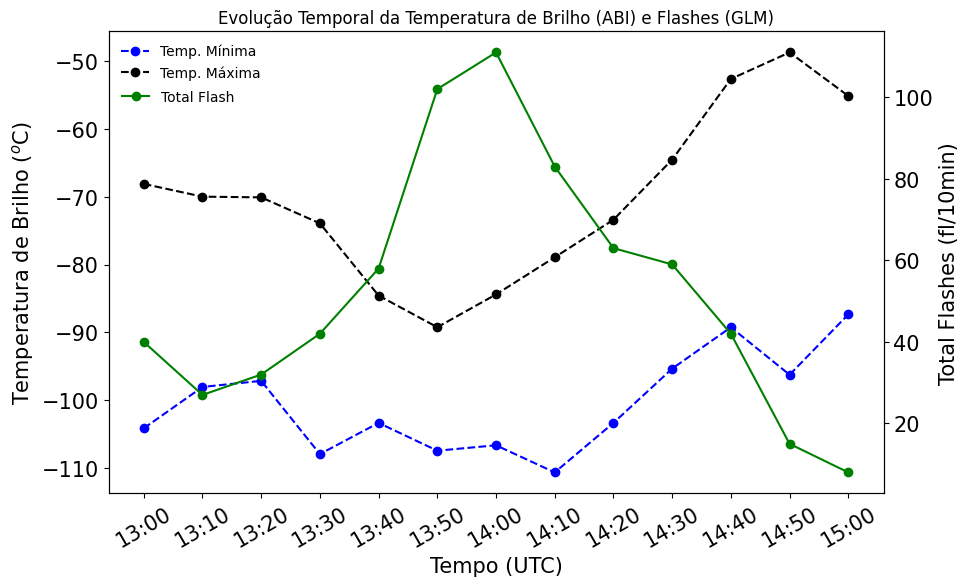

In [16]:
#==================================================================================#
#                        CONFIGURAÇÃO INICIAL
#==================================================================================#
# importa biblioteca
import matplotlib.pyplot as plt

# tamanho da figura
fig, ax1 = plt.subplots(figsize=(10, 6))

#==================================================================================#
#             PLOT-1: temperatura no eixo y primério (ax1)
#==================================================================================#
# plota figura
ax1.plot(df_ts['time'].values, df_ts['temp_min_sm'].values/10. - 273.15, marker='o', color='blue', linestyle='--', label='Temp. Mínima')
ax1.plot(df_ts['time'].values, df_ts['temp_mean_sm'].values/10. - 273.15, marker='o', color='black', linestyle='--', label='Temp. Máxima')

# nomes dos eixos X e Y
ax1.set_xlabel('Tempo (UTC)', color='black', size=15)
ax1.set_ylabel('Temperatura de Brilho ($^o$C)', color='black', size=15)

# configuração dos eixos X e Y
ax1.tick_params(axis='x', labelcolor='black', labelsize=15, rotation=30)
ax1.tick_params(axis='y', labelcolor='black', labelsize=15)

# legenda
ax1.legend(loc='upper left', frameon=False)

#==================================================================================#
#             PLOT-2: flash no eixo y secundário (ax2)
#==================================================================================#
# adiciona eixo adicional
ax2 = ax1.twinx()

# plota figura
ax2.plot(df_ts['time'].values, df_ts['flash_total_sm'].values, marker='o', color='green', label='Total Flash')

# nome eixo Y
ax2.set_ylabel('Total Flashes (fl/10min)', color='black', size=15)

# configuração do eixo Y
ax2.tick_params(axis='y', labelcolor='black', labelsize=15)

# adiciona legenda
ax2.legend(bbox_to_anchor=(0.178, 0.90), frameon=False)

# título da figura
plt.title(f'Evolução Temporal da Temperatura de Brilho (ABI) e Flashes (GLM)')

#==================================================================================#
#                           SALVA E MOSTRA A FIGURA
#==================================================================================#
# salva a figura
plt.savefig(f'{output}/script_2c_evolucacao_temporal_2.png', bbox_inches='tight', dpi=300)

# mostra a figura
plt.show()